# Black Friday

## Project Objective
- A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summaries of various customers for selected high-volume products from last month.
- The objective is to clean, prepare and analyse the Black friday Sales dataset taken from Analytics Vidhya.
- We have to analyze and the sales of an product in the retail store based on age, gender, marital status, occupation of the dataset. 


- Using Black Friday sales dataset we will try to find out following questions answer.
 1. Which age group has purchased more number of products?
 2. Which product category has been sold most?
 3. Which city_category has more purchases? 
 4. What will be the purchases with respect to staying in current city?
 
 ### Analysis Involve Phases:
  1. Data Collection
  2. Data Understanding
  3. Data Cleaning 
  4. Data Analyse

In [1]:
## Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
%matplotlib inline

In [2]:
pd.set_option('display.max_rows', 530)

### Phase 1: Data Collection

#### Dataset information:
- The dataset used in this analysis contains information of transactions in a store on Black Friday, including customers' demographical features (age, gender, marital status, city type, stay in the current city), product details (productid and product category) and transaction details also total purchase amount from last month.
- The dataset comes from a competition hosted by Analytics Vidhya.
- The dataset has 783667 rows and 12 columns.

In [3]:
final_df=pd.read_csv('Black_Friday.csv')

### Phase 2: Data Understanding

In [4]:
final_df.shape

(783667, 12)

In [5]:
final_df.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0


In [6]:
final_df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [7]:
final_df = final_df.rename(columns={'User_ID':'user_id', 
                         'Product_ID': 'product_id', 
                         'Gender': 'gender', 
                         'Age': 'age_group', 
                         'Occupation': 'occupation_code',
                         'City_Category': 'city_category', 
                         'Stay_In_Current_City_Years': 'stay_in_current_city_years', 
                         'Marital_Status':'marital_status', 
                         'Product_Category_1': 'product_category_1', 
                         'Product_Category_2': 'product_category_2',
                         'Product_Category_3': 'product_category_3',
                         'Purchase':'purchase_amount'
                         })

In [8]:
final_df.isnull().sum()

user_id                            0
product_id                         0
gender                             0
age_group                          0
occupation_code                    0
city_category                      0
stay_in_current_city_years         0
marital_status                     0
product_category_1                 0
product_category_2            245982
product_category_3            545809
purchase_amount               233599
dtype: int64

In [9]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   user_id                     783667 non-null  int64  
 1   product_id                  783667 non-null  object 
 2   gender                      783667 non-null  object 
 3   age_group                   783667 non-null  object 
 4   occupation_code             783667 non-null  int64  
 5   city_category               783667 non-null  object 
 6   stay_in_current_city_years  783667 non-null  object 
 7   marital_status              783667 non-null  int64  
 8   product_category_1          783667 non-null  int64  
 9   product_category_2          537685 non-null  float64
 10  product_category_3          237858 non-null  float64
 11  purchase_amount             550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 71.7+ MB


In [10]:
final_df.product_category_1.unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19])

### Observation

  1. user_id
  - Represents unique_id of the customer.
  
  2. product_id
  - Represents unique_id of the product.
  
  3. gender
  - Represents gender of the customer.
  - It contain M for Male and F for Female.
  
  4. age_group
  - Represents Age group of the customers.
  - It have 7 distinct age groups.
  - It is categorical type variable. 
   
  5. occupation_code
  - Represents Occupation code of the customer.
  - It have 21 unique occupation code.
  
  
  6. city_category
  - Represents city of the customer where he is residing.
  - It have 3 categorical values - A, B and C
  
  7. stay_in_current_city_years
  - Represents number of years customer stay in the city.
  - It is an cateogrical column and have 5 different values.
      - 0, 1, 2, 3 and 4+
  
  8. marital_status
  - Represents maritial status of customer.
  - It is of boolean type of column contains 
      - 0 - not married and 
      - 1 - married
  
  9. product_category_1
  - It have category code of product.
 
  10. product_category_2
  - It have category code of product.
  - It has 245982 null values.
  
  11. product_category_3
  - It have category code of product.
  - It has 545809 null values.
  
  12. purchase_amount
  - Represents purchase amount or amount paid by the customer.
  - It has 233599 null values.

### Phase 3: Data Cleaning and Handling Null Values

#### Function defination

#### Step 1: Delete user_id column
- Analysis not based on each user hence, deleting user_id column.

#### Step 2: Handle Categorical Columns
- Gender:
    - Replaced F with Female and M with Male

- age_group:
    - Replace age_group with ranks for example 0-17 is 1 , 18-25 is 2 and so on.
    



In [11]:
def data_cleaning(dataframe):
    ## Step 1 - Delete user_id column
    dataframe = dataframe.drop(['user_id'],axis=1)
    print("Drop user_is column - done")
    
    ## Step 2 - Handle Categorical Columns
    #Handling the categorical feature Gender column
    dataframe['gender']= dataframe['gender'].map({'F':'Female','M':'Male'})
   
    # Age column have age range values, using map function giving ranks with respect to age range for example 0-17 is 1 , 18-25 is 2 and so on.
    dataframe['age_group_rank'] = dataframe['age_group'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})
    print("Ranking age group column - done")
    
    print("Function executed sucessfully")

    return dataframe

#### Handling Null Values

##### Step 1: Replace null with zero in product_category 2 and 3:
- Tried to found out for each product_id's:
    - How many values corresponding values are in  product_category_1, product_category_2 and product_category_3.
- Found that for each product_id:
    - Not have corresponding values for null's in product_category_2 , product_category_3 
- Hence replacing all nulls in product_category 2 and 3 it with zero.

##### Step 2: Replace null puchase (amount) with mean with resepect to product_id:

##### Step 3: After step 2 - drop rows having incomplete information - purchase_amount
- After Step 2 - found that there are 61 rows have null values in purchase_amount column.
    - Becasue, as there is no corrospoing rows for purchased product_id in dataset to compute mean purchase_amount.
    - In this case, we are deleting those records/rows.
    - In real world:
        -  We try to get this puchase_amount null or incomplete information from accounts/sales department.

In [12]:
def handling_null_values(dataframe):
    
    ## Step 1: Replace null with zero in product_category 2 and 3
    dataframe['product_category_2'] = dataframe['product_category_2'].fillna(0)
    dataframe['product_category_3'] = dataframe['product_category_3'].fillna(0)
    print('Step 1 - Finished')
    
    ## Step 2: Replace null puchase (amount) with mean with resepect to product_id.
    dataframe['purchase_amount'] = dataframe['purchase_amount'].fillna(dataframe.groupby('product_id')['purchase_amount'].transform('mean'))
    print('Step 2 - Finished')
    
    ## Step 3: After step 2 - drop rows having incomplete information - purchase (amount)
    before_drop_no_rows = dataframe.shape[0]
    
    incomplete_rows_index_list =  list(dataframe[dataframe.purchase_amount.isnull()].index)
    print(f"Number of rows have null purchase amount {len(incomplete_rows_index_list)}")
    
    for i in incomplete_rows_index_list:
        dataframe = dataframe.drop(i,axis=0)
    
    after_drop_no_rows = dataframe.shape[0]
    print(f"Number of rows deleted from dataset are: {before_drop_no_rows - after_drop_no_rows}")
    
    if len(incomplete_rows_index_list) == (before_drop_no_rows - after_drop_no_rows):
        print('Step 3 - Finished & Function executed sucessfully')
    else:
        print("Error!! executed with error in drop rows.")
    
    return dataframe


#### Code Execution

In [13]:
data_cleaning_df = data_cleaning(dataframe = final_df)

Drop user_is column - done
Ranking age group column - done
Function executed sucessfully


In [14]:
data_cleaning_df.product_category_1.isnull().sum()

0

In [15]:
data_cleaning_df.product_category_2.isnull().sum()

245982

In [16]:
data_cleaning_df.product_category_3.isnull().sum()

545809

In [17]:
handle_null_values_df = handling_null_values(dataframe = data_cleaning_df)

Step 1 - Finished
Step 2 - Finished
Number of rows have null purchase amount 61
Number of rows deleted from dataset are: 61
Step 3 - Finished & Function executed sucessfully


### Phase 4: Data Analysis

In [132]:
analysis_df = handle_null_values_df.copy()

### Q.1 Which age group has purchased more number of products?

In [133]:
count_purchase_products_by_gender = analysis_df.groupby(['gender','age_group'])['product_id'].count().reset_index(name='number_of_products')
count_purchase_products_by_gender


,gender,age_group,number_of_products
0,Female,0-17,7147
1,Female,18-25,35063
2,Female,26-35,72427
3,Female,36-45,38860
4,Female,46-50,18742
5,Female,51-55,14141
6,Female,55+,7238
7,Male,0-17,14183
8,Male,18-25,106872
9,Male,26-35,240571


<AxesSubplot:xlabel='age_group', ylabel='number_of_products'>

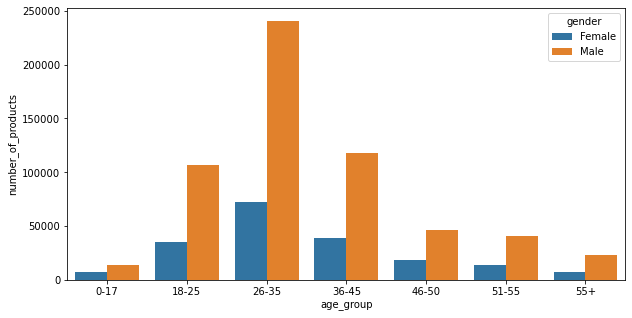

In [55]:
# Visulaisation Age vs Purchase Analysis
plt.figure(figsize=(10,5))
sns.barplot(x='age_group',y='number_of_products', hue='gender', data=count_purchase_products_by_gender)

### Q.2.How many males and females in dataset and what is the ratio of each?

In [180]:
count_male_female_df = analysis_df['gender'].value_counts().reset_index(name='no_customers')
count_male_female_df

,index,no_customers
0,Male,589988
1,Female,193618


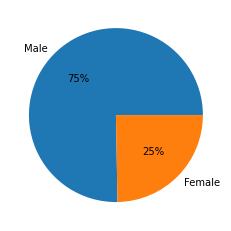

In [181]:
graph = plt.pie(count_male_female_df.no_customers, labels = count_male_female_df['index'],  autopct='%.0f%%')


### Q.3. What is the age group of each male and females?How many males and females in each age group?

In [183]:
count_gender_age_df = analysis_df.groupby(['age_group']).gender.value_counts().rename_axis(['age_group','gender']).reset_index(name='count')
count_gender_age_df



,age_group,gender,count
0,0-17,Male,14183
1,0-17,Female,7147
2,18-25,Male,106872
3,18-25,Female,35063
4,26-35,Male,240571
5,26-35,Female,72427
6,36-45,Male,117860
7,36-45,Female,38860
8,46-50,Male,46528
9,46-50,Female,18742


<AxesSubplot:xlabel='age_group', ylabel='count'>

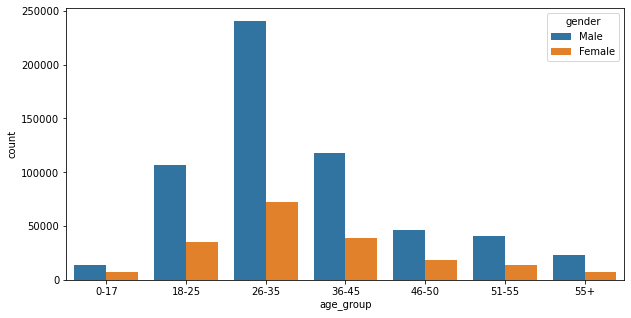

In [184]:
plt.figure(figsize=(10,5))
sns.barplot(x='age_group',y='count', hue='gender', data=count_gender_age_df)

### Observation: ---- todo update
- 1. Age and Purchase graph has a uniform distribution.
- 2. Purchasing of men is slightly more in age-group 51-55.

### Q.4 Which product category has been sold most?

In [221]:
def chart_by_category(dataframe, category_col_name):
    dataframe = dataframe.groupby([category_col_name])['product_id'].count().reset_index(name='number_of_products')
    dataframe = dataframe.sort_values(by='number_of_products', ascending=False)
    plt.figure(figsize=(10,5))
    sns.barplot(category_col_name,'number_of_products', data=dataframe, order=dataframe[category_col_name])

    return

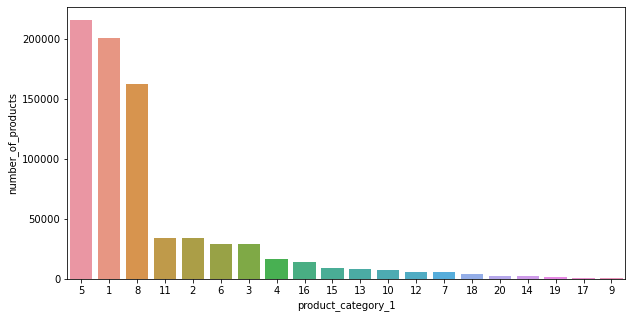

In [222]:
chart_by_category(dataframe = analysis_df, category_col_name = 'product_category_1')

/Users/ganesh_dhasade/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


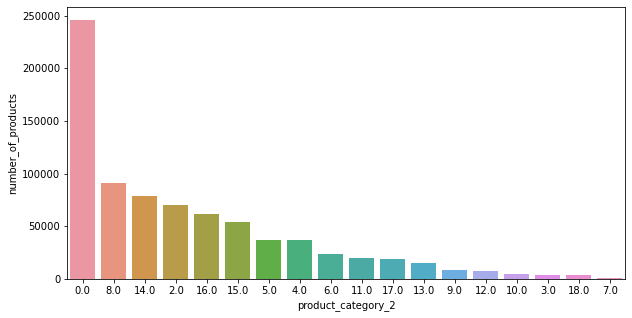

In [223]:
chart_by_category(dataframe = analysis_df, category_col_name = 'product_category_2')

/Users/ganesh_dhasade/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


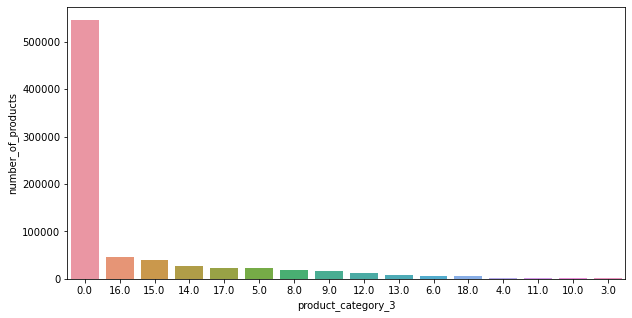

In [224]:
chart_by_category(dataframe = analysis_df, category_col_name = 'product_category_3')

### Observation: 
- product_category_1 has been purchased more than product_category_2 and product_category_3.

#### Q.5 Which city_category has more purchases? 

In [215]:
count_cust_city_cat_df = analysis_df['city_category'].value_counts().reset_index(name='no_customers')
count_cust_city_cat_df

,index,no_customers
0,B,329720
1,C,243666
2,A,210220


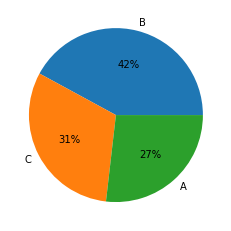

In [216]:
graph = plt.pie(count_cust_city_cat_df.no_customers, labels = count_male_female_df['index'],  autopct='%.0f%%')

/Users/ganesh_dhasade/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='index', ylabel='no_customers'>

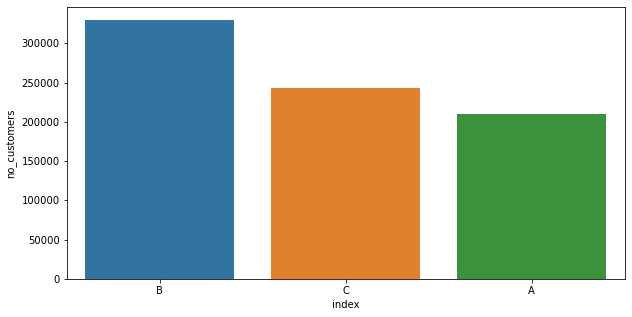

In [226]:
plt.figure(figsize=(10,5))
sns.barplot('index','no_customers', data=count_cust_city_cat_df, order=count_cust_city_cat_df['index'])

### Observation: - todo
 - B city_category has more number of counts hence it might represents the urban area where most of the population resides.

### Q.6 What will be the purchases with respect to staying in current city?

In [236]:
count_purchase_stay_city_df = analysis_df.groupby(['stay_in_current_city_years'])['product_id'].count().reset_index(name='number_of_purchases')
count_purchase_stay_city_df = count_purchase_stay_city_df.sort_values(by = 'number_of_purchases', ascending = False)
count_purchase_stay_city_df



,stay_in_current_city_years,number_of_purchases
1,1,276398
2,2,145418
3,3,135420
4,4+,120661
0,0,105709


/Users/ganesh_dhasade/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stay_in_current_city_years', ylabel='number_of_purchases'>

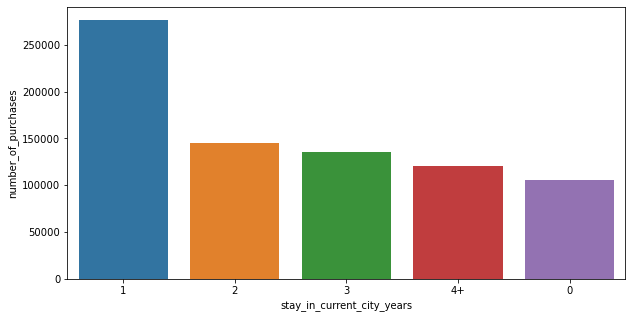

In [237]:
plt.figure(figsize=(10,5))
sns.barplot('stay_in_current_city_years','number_of_purchases', data=count_purchase_stay_city_df, order=count_purchase_stay_city_df['stay_in_current_city_years'])


In [ ]:
### Q.7 What average spend by gender?

In [ ]:
### Q.8 What average spend on each category?

In [ ]:
### Q.9 What average spend on each city?

In [ ]:
### Q.10 What average spend on each occupation?

In [ ]:
### Q.10 Top 10 most sold products?

In [ ]:
### Q.11 Top 10 most expensive sold products?

In [ ]:
### Q.12 Top 10 most popular sold products?

### Observation: --- todo update
- The tendency looks like the longest someone is living in that city the less prone they are to buy new things.
- Hence, if someone is new in town and needs a great number of new things for their house that they’ll take advantage of the low prices in Black Friday to purchase all the things needed.

### Conclusion - Results:

#### Q.1 Which age group has purchased more number of products?

- 1. Age and Purchase graph has a uniform distribution.
- 2. Purchasing of men is slightly more in age-group 51-55.

#### Q.2  Which product category has been sold most?

- product_category_1 has been purchased more than product_category_2 and product_category_3.

#### Q.3 Which city_category has more purchases? 

 - B city_category has more number of counts hence it might represents the urban area where most of the population resides.

#### Q.4 What will be the purchases with respect to staying in current city?

- The tendency looks like the longest someone is living in that city the less prone they are to buy new things.
- Hence, if someone is new in town and needs a great number of new things for their house that they’ll take advantage of the low prices in Black Friday to purchase all the things needed.